In [1]:
import pandas_datareader as pdr
import numpy as np
import datetime as dt
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
tickers = ['XIC.TO', 'CSU.TO', 'BAM', 'VFV.TO', 'HXQ.TO', 'ZFL.TO', 'PGHY', 'HGY.TO', 'VRE.TO', 'XEF.TO', 'NVDA', 'MELI', 'ADS']
start = dt.datetime(2018, 12, 30)
end = dt.datetime(2021, 12, 30)
df_stocks = pdr.get_data_yahoo(tickers, start, end, interval="d")

df_stocks = df_stocks['Adj Close']

df_stocks

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS
Date,,,,,,,,,,,,,
2018-12-31,21.078619,865.645081,24.663780,57.912560,12.005000,15.984074,19.428419,3.993624,26.817978,26.027300,33.161434,292.850006,113.002800
2019-01-02,21.087870,842.712769,24.412958,57.941292,12.055000,16.131479,19.454092,3.993624,26.711586,25.785442,33.837086,298.010010,116.993454
2019-01-03,20.875141,817.719849,24.367937,56.025879,11.600000,16.352587,19.454092,4.010691,26.525414,25.320337,31.792746,296.589996,114.034340
2019-01-04,21.217354,834.748230,25.377645,57.644398,12.007500,16.168327,19.505447,3.976558,26.747049,25.971489,33.829628,315.329987,121.752083
2019-01-07,21.319099,872.430542,25.750654,57.606091,12.062500,16.094629,19.548239,3.993624,27.021870,25.915676,35.620594,328.940002,121.744545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,2325.000000,NaN,107.399185,59.110001,17.817001,NaN,5.114951,37.893097,35.696564,NaN,NaN,NaN
2021-12-27,NaN,NaN,60.810001,NaN,NaN,NaN,21.299999,NaN,NaN,NaN,309.450012,1299.109985,68.050003
2021-12-28,NaN,NaN,60.840000,NaN,NaN,NaN,21.290001,NaN,NaN,NaN,303.220001,1316.280029,67.830002


In [6]:
# Checking how many missing NaN
df_stocks.isna().sum()

Symbols
XIC.TO    16
CSU.TO    16
BAM       13
VFV.TO    16
HXQ.TO    16
ZFL.TO    16
PGHY      13
HGY.TO    16
VRE.TO    16
XEF.TO    16
NVDA      13
MELI      13
ADS       13
dtype: int64

In [7]:
# Checking if there are double-dates (divident stocks might show date a second time for the divident value)
print(df_stocks.index.has_duplicates)
print(df_stocks.index.nunique())
print(len(df_stocks))

False
770
770


In [8]:
# No duplicated dates
# 1.9% NaN for specific stocks; it is not a big impact to fill these gaps and certainly stem from days where certain stock markets were closed and others not.
df_stocks.fillna(method="ffill", inplace=True)
df_stocks

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS
Date,,,,,,,,,,,,,
2018-12-31,21.078619,865.645081,24.663780,57.912560,12.005000,15.984074,19.428419,3.993624,26.817978,26.027300,33.161434,292.850006,113.002800
2019-01-02,21.087870,842.712769,24.412958,57.941292,12.055000,16.131479,19.454092,3.993624,26.711586,25.785442,33.837086,298.010010,116.993454
2019-01-03,20.875141,817.719849,24.367937,56.025879,11.600000,16.352587,19.454092,4.010691,26.525414,25.320337,31.792746,296.589996,114.034340
2019-01-04,21.217354,834.748230,25.377645,57.644398,12.007500,16.168327,19.505447,3.976558,26.747049,25.971489,33.829628,315.329987,121.752083
2019-01-07,21.319099,872.430542,25.750654,57.606091,12.062500,16.094629,19.548239,3.993624,27.021870,25.915676,35.620594,328.940002,121.744545
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,33.737690,2325.000000,59.939999,107.399185,59.110001,17.817001,21.290001,5.114951,37.893097,35.696564,296.399994,1262.729980,69.070000
2021-12-27,33.737690,2325.000000,60.810001,107.399185,59.110001,17.817001,21.299999,5.114951,37.893097,35.696564,309.450012,1299.109985,68.050003
2021-12-28,33.737690,2325.000000,60.840000,107.399185,59.110001,17.817001,21.290001,5.114951,37.893097,35.696564,303.220001,1316.280029,67.830002


In [9]:
df_stocks.describe()

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,26.869739,1530.237359,39.118523,78.533610,24.246464,18.002644,20.559364,4.814797,30.906595,30.335837,112.371077,1023.276117,77.704585
std,3.751674,345.265247,9.560117,13.057270,14.267909,1.156823,0.834005,0.479984,4.098268,3.097153,73.469614,489.030590,30.048640
min,17.139843,817.719849,21.612253,56.025879,11.600000,15.845884,16.551645,3.925595,18.552408,22.093575,31.792746,292.850006,17.562628
25%,24.328178,1267.651703,31.725788,67.421089,14.584375,17.142757,20.198024,4.434938,28.349163,28.128268,46.873575,579.199997,55.887375
50%,25.613499,1493.828430,36.022669,75.709248,19.622499,17.764734,20.443172,4.987541,31.247707,29.288013,95.570892,977.315002,79.784634
75%,30.079419,1733.559326,44.931885,87.934896,23.503749,19.067126,21.337168,5.169670,33.499472,33.150744,143.246712,1503.697510,96.596777
max,34.937408,2372.760010,61.710285,108.754997,59.660000,20.632425,21.662685,5.758933,38.529999,36.349186,333.719147,1984.339966,136.849213


In [10]:
df_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 770 entries, 2018-12-31 to 2021-12-30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   XIC.TO  770 non-null    float64
 1   CSU.TO  770 non-null    float64
 2   BAM     770 non-null    float64
 3   VFV.TO  770 non-null    float64
 4   HXQ.TO  770 non-null    float64
 5   ZFL.TO  770 non-null    float64
 6   PGHY    770 non-null    float64
 7   HGY.TO  770 non-null    float64
 8   VRE.TO  770 non-null    float64
 9   XEF.TO  770 non-null    float64
 10  NVDA    770 non-null    float64
 11  MELI    770 non-null    float64
 12  ADS     770 non-null    float64
dtypes: float64(13)
memory usage: 100.4 KB


In [11]:
# Let's create a function that can plot a dataset
def plot_that_chart(df, title):
    df.plot(title=title, figsize=(20, 7))
    plt.grid()

    plt.show();

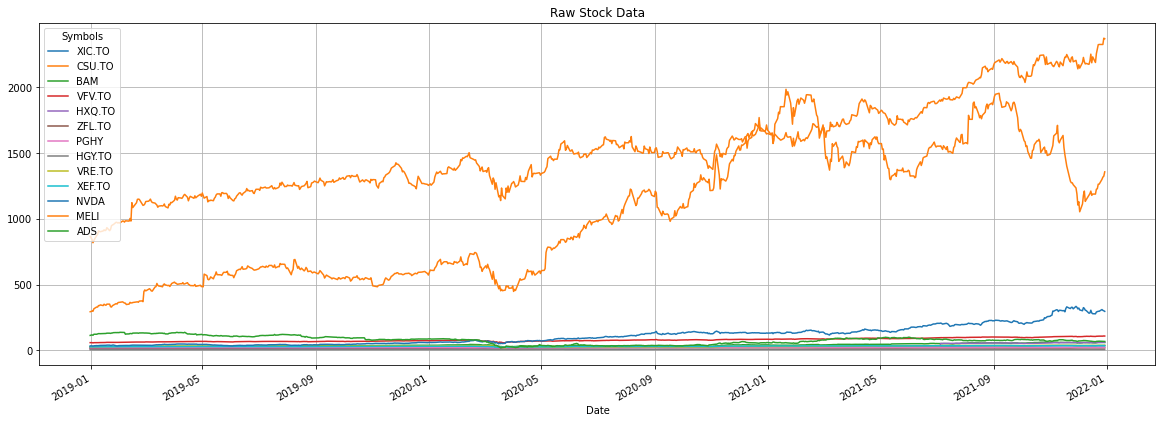

In [12]:
plot_that_chart(df_stocks, 'Raw Stock Data')

In [13]:
# Scaling to first closing values
df_stocks_normalized = df_stocks / df_stocks.iloc[0]
df_stocks_normalized

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS
Date,,,,,,,,,,,,,
2018-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-02,1.000439,0.973508,0.989830,1.000496,1.004165,1.009222,1.001321,1.000000,0.996033,0.990708,1.020375,1.017620,1.035315
2019-01-03,0.990347,0.944636,0.988005,0.967422,0.966264,1.023055,1.001321,1.004273,0.989091,0.972838,0.958726,1.012771,1.009128
2019-01-04,1.006582,0.964308,1.028944,0.995370,1.000208,1.011527,1.003965,0.995727,0.997355,0.997856,1.020150,1.076763,1.077425
2019-01-07,1.011409,1.007839,1.044068,0.994708,1.004790,1.006917,1.006167,1.000000,1.007603,0.995711,1.074157,1.123237,1.077359
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,1.600565,2.685858,2.430284,1.854506,4.923782,1.114672,1.095817,1.280779,1.412974,1.371505,8.938093,4.311866,0.611224
2021-12-27,1.600565,2.685858,2.465559,1.854506,4.923782,1.114672,1.096332,1.280779,1.412974,1.371505,9.331623,4.436093,0.602197
2021-12-28,1.600565,2.685858,2.466775,1.854506,4.923782,1.114672,1.095817,1.280779,1.412974,1.371505,9.143754,4.494724,0.600251


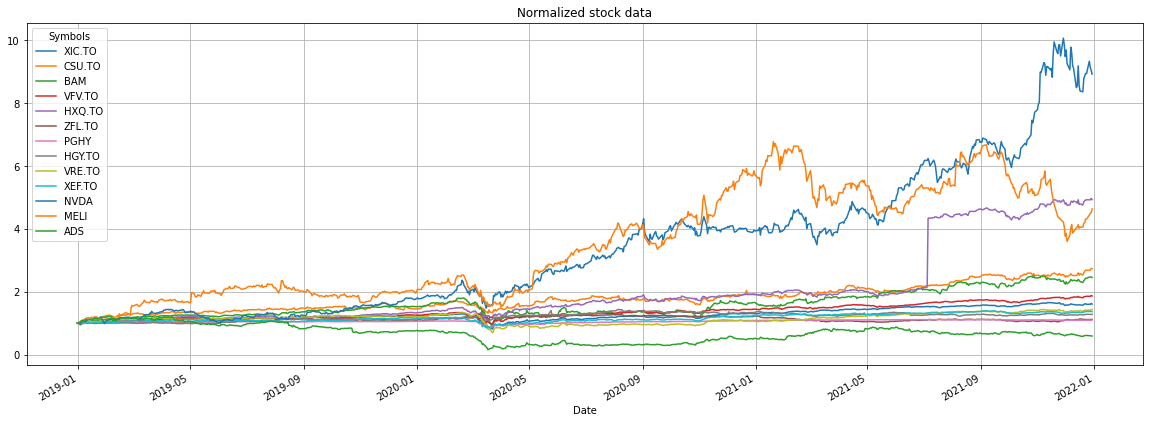

In [14]:
# Plot the normalized stock data
plot_that_chart(df_stocks_normalized, 'Normalized stock data')

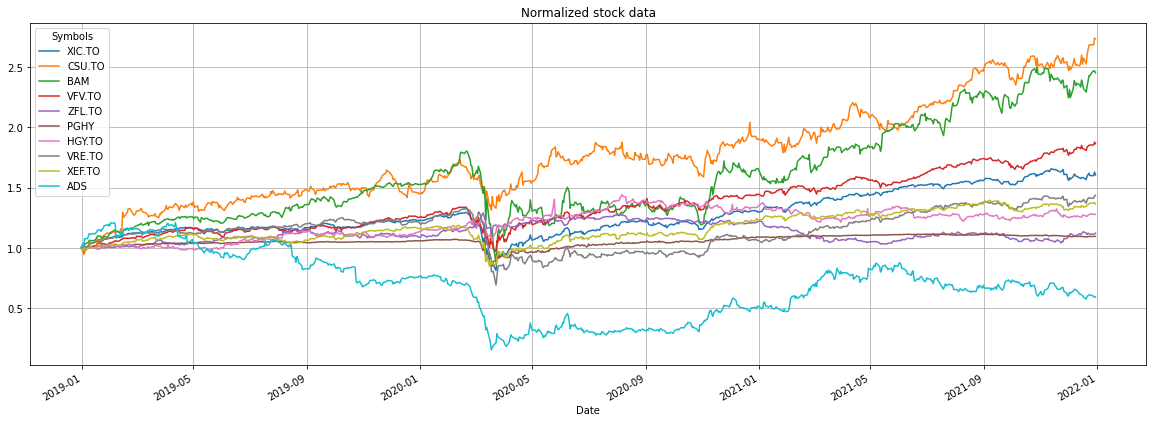

In [15]:
plot_that_chart(df_stocks_normalized.drop(['NVDA', 'HXQ.TO', 'MELI'], axis=1), 'Normalized stock data')

In [16]:
def calc_return(df):
    '''Function to generate a detaframe with returns
    - Input: Dataframe with raw stock data
    - Output: Dataframe with returns'''

    x = df.copy()
    
    for i in range(1, len(df)):
        x.iloc[i] = (df.iloc[i] - df.iloc[i-1]) / df.iloc[i-1] * 100
    #x = np.sum(np.log(df/df.shift()), axis=1)

    x.iloc[0] = 0

    return x

In [17]:
# Generate data table with daily returns
df_stock_returns = calc_return(df_stocks)
df_stock_returns

Symbols,XIC.TO,CSU.TO,BAM,VFV.TO,HXQ.TO,ZFL.TO,PGHY,HGY.TO,VRE.TO,XEF.TO,NVDA,MELI,ADS
Date,,,,,,,,,,,,,
2018-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2019-01-02,0.043886,-2.649159,-1.016965,0.049613,0.416495,0.922203,0.132141,0.000000,-0.396719,-0.929246,2.037462,1.761995,3.531465
2019-01-03,-1.008772,-2.965770,-0.184415,-3.305782,-3.774367,1.370658,0.000000,0.427349,-0.696973,-1.803751,-6.041715,-0.476499,-2.529299
2019-01-04,1.639331,2.082422,4.143594,2.888877,3.512925,-1.126791,0.263982,-0.851032,0.835560,2.571655,6.406752,6.318484,6.767911
2019-01-07,0.479540,4.514213,1.469832,-0.066454,0.458050,-0.455817,0.219382,0.429153,1.027479,-0.214900,5.294075,4.316118,-0.006191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-24,-1.241806,0.069300,0.000000,0.139435,0.067718,-0.223453,0.000000,0.390619,-0.341120,0.389321,0.000000,0.000000,0.000000
2021-12-27,0.000000,0.000000,1.451456,0.000000,0.000000,0.000000,0.046963,0.000000,0.000000,0.000000,4.402840,2.881060,-1.476758
2021-12-28,0.000000,0.000000,0.049332,0.000000,0.000000,0.000000,-0.046940,0.000000,0.000000,0.000000,-2.013253,1.321677,-0.323293


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

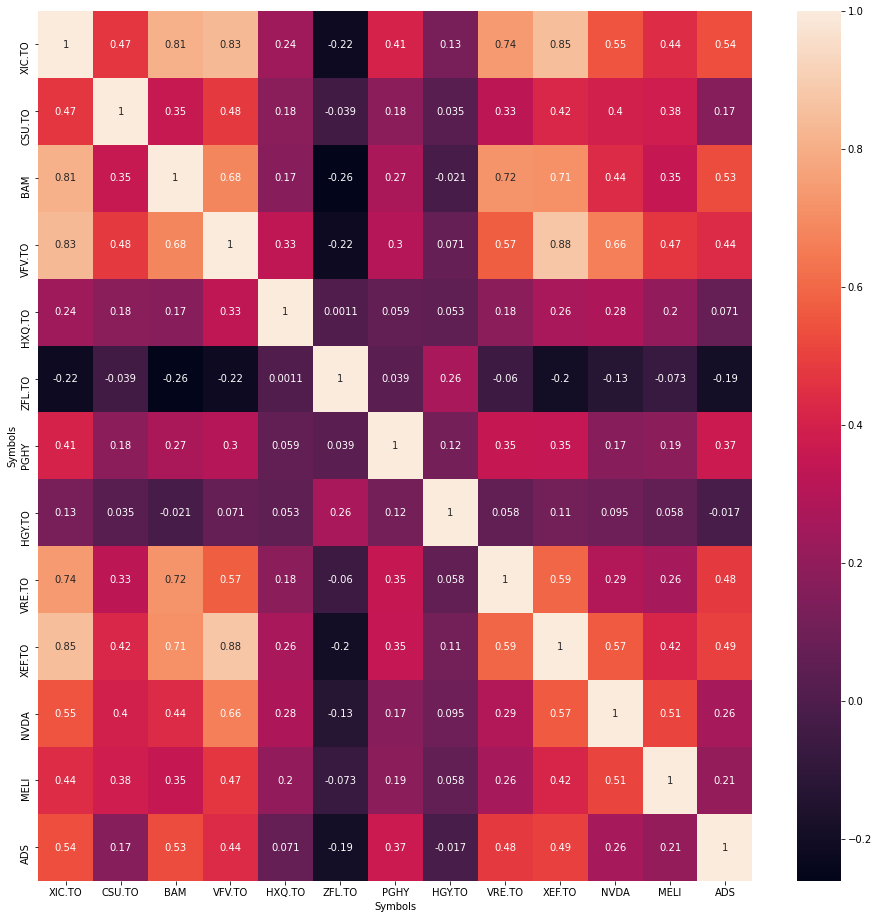

In [18]:
# Visualize correlations
plt.figure(figsize=(16, 16))
sns.heatmap(df_stock_returns.corr(), annot=True)

### Obtaining the risk free rate rf
Mostly, the rf rate is extracted from the [US government tresury bond](https://www.treasury.gov/resource-center/data-chart-center/interest-rates/Pages/TextView.aspx?data=billratesAll).

The value can be calculated or looked up online, but I will take 0 for simplicity.

In [19]:
# 3 year treasury yield
rf = 0

This rf is already the yearly value. Our current data table contains the daily returns. We need to translate these to yearly values. There are 252 trading days in a year.

In [20]:
def sharpe_calculation(stock):
    '''Function to calculate the Sharpe Ratio
    Input: Range of a stock's daily returns
    Output: Sharpe Ratio'''

    # Compound Annual Growth Rate
    cagr = ((df_stocks[stock].iloc[-1] / df_stocks[stock].iloc[0]) ** (1 / 3) - 1) * 100

    # Annualized volatility
    std_yrly = df_stock_returns[stock].std() * np.sqrt(252)

    return (cagr - rf) / std_yrly

In [21]:
# OK, let's now calculate all
for i in df_stock_returns.columns:
    if i != '^GSPC':
        print('Sharpe Ratio for {}: {:2.4}'.format(i, sharpe_calculation(i)))

Sharpe Ratio for XIC.TO: 0.8552
Sharpe Ratio for CSU.TO: 1.46
Sharpe Ratio for BAM: 0.9944
Sharpe Ratio for VFV.TO: 1.136
Sharpe Ratio for HXQ.TO: 1.121
Sharpe Ratio for ZFL.TO: 0.3429
Sharpe Ratio for PGHY: 0.3071
Sharpe Ratio for HGY.TO: 0.4901
Sharpe Ratio for VRE.TO: 0.5464
Sharpe Ratio for XEF.TO: 0.6165
Sharpe Ratio for NVDA: 2.242
Sharpe Ratio for MELI: 1.32
Sharpe Ratio for ADS: -0.238
